# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기
### 12161575 박재형

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [1]:
from tensorflow import keras

keras.__version__

'2.2.4-tf'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.18.1'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
#########################코드########################
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')
#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [8]:
from sklearn.model_selection import train_test_split
#####################################################
def generate_data(df, t_r):
    train_len = int(len(df)*t_r)
    X_train = df.iloc[:train_len,:11]
    X_test = df.iloc[train_len:,:11]
    Y_train = df.iloc[:train_len,-1]
    Y_test = df.iloc[train_len:,-1]
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [9]:
x_white_train, y_white_train, x_white_test, y_white_test = generate_data(white_wine, 0.7)
x_red_train, y_red_train, x_red_test, y_red_test= generate_data(red_wine, 0.7)
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 11)                363       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________
Train on 3428 samples
Epoch 1/100
3428/3428 [==============================] - 0s 39us/sample - loss: 7.9644 - acc: 0.3011
Epoch 2/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.4348 - acc: 0.3994
Epoch 3/100
3428/3428 [==============================] - 0s 26us/sample - loss:

3428/3428 [==============================] - 0s 20us/sample - loss: 1.1602 - acc: 0.4799
Epoch 71/100
3428/3428 [==============================] - 0s 19us/sample - loss: 1.1537 - acc: 0.4959
Epoch 72/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1492 - acc: 0.4956
Epoch 73/100
3428/3428 [==============================] - 0s 19us/sample - loss: 1.1429 - acc: 0.4953
Epoch 74/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1417 - acc: 0.4825
Epoch 75/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1890 - acc: 0.4819
Epoch 76/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1443 - acc: 0.4950
Epoch 77/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1462 - acc: 0.4822
Epoch 78/100
3428/3428 [==============================] - 0s 20us/sample - loss: 1.1615 - acc: 0.4840
Epoch 79/100
3428/3428 [==============================] - 0s 19us/sample - loss: 1.1568 - acc: 

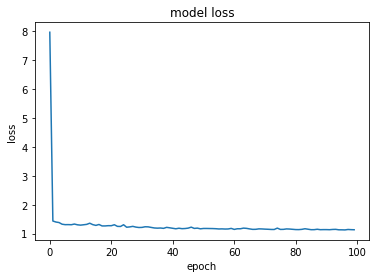

In [11]:
##########################################################
#model white
modelw = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelw.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelw.summary()
white_result=modelw.fit(x_white_train, y_white_train, epochs=100)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################

In [12]:
modelw.evaluate(x_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.1867 - acc: 0.4184


[1.186718251916016, 0.41836736]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 11)                363       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________
Train on 1119 samples
Epoch 1/100
1119/1119 [==============================] - 0s 65us/sample - loss: 10.6894 - acc: 0.2127
Epoch 2/100
1119/1119 [==============================] - 0s 29us/sample - loss: 2.2635 - acc: 0.3360
Epoch 3/100
1119/1119 [==============================] - 0s 26us/sample - loss: 1.3377 - acc: 0.4611
Epoch 4/100
1119/1119 [==============================] -

1119/1119 [==============================] - 0s 25us/sample - loss: 0.9258 - acc: 0.5970
Epoch 74/100
1119/1119 [==============================] - 0s 23us/sample - loss: 0.9321 - acc: 0.5871
Epoch 75/100
1119/1119 [==============================] - 0s 23us/sample - loss: 0.9473 - acc: 0.6032
Epoch 76/100
1119/1119 [==============================] - 0s 29us/sample - loss: 0.9240 - acc: 0.6077
Epoch 77/100
1119/1119 [==============================] - 0s 27us/sample - loss: 0.9289 - acc: 0.5880
Epoch 78/100
1119/1119 [==============================] - 0s 24us/sample - loss: 0.9429 - acc: 0.5925
Epoch 79/100
1119/1119 [==============================] - 0s 24us/sample - loss: 0.9569 - acc: 0.5791
Epoch 80/100
1119/1119 [==============================] - 0s 22us/sample - loss: 0.9351 - acc: 0.6032
Epoch 81/100
1119/1119 [==============================] - 0s 23us/sample - loss: 0.9219 - acc: 0.6077
Epoch 82/100
1119/1119 [==============================] - 0s 22us/sample - loss: 0.9199 - acc: 

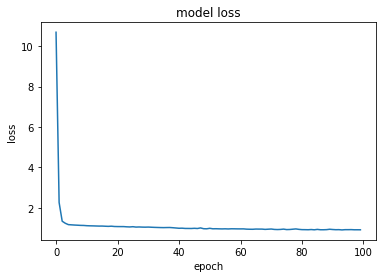

In [16]:
##########################################################
#model red
modelr = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelr.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelr.summary()
red_result=modelr.fit(x_red_train, y_red_train, epochs=100)
plt.plot(red_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################

In [17]:
modelr.evaluate(x_red_test,y_red_test,verbose=2)

480/480 - 0s - loss: 1.0595 - acc: 0.5625


[1.0595375418663024, 0.5625]

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 11)                363       
Total params: 4,971
Trainable params: 4,971
Non-trainable params: 0
____________________________________________________

Epoch 70/100
3428/3428 [==============================] - 0s 28us/sample - loss: 1.0891 - acc: 0.5090
Epoch 71/100
3428/3428 [==============================] - 0s 26us/sample - loss: 1.0894 - acc: 0.5140
Epoch 72/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.0822 - acc: 0.5190
Epoch 73/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.0913 - acc: 0.5117
Epoch 74/100
3428/3428 [==============================] - 0s 26us/sample - loss: 1.1177 - acc: 0.5061
Epoch 75/100
3428/3428 [==============================] - 0s 29us/sample - loss: 1.0915 - acc: 0.5105
Epoch 76/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.0793 - acc: 0.5137
Epoch 77/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.0854 - acc: 0.5140
Epoch 78/100
3428/3428 [==============================] - 0s 28us/sample - loss: 1.0810 - acc: 0.5230
Epoch 79/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1

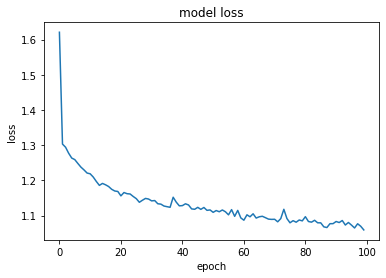

In [19]:
##########################################################
#model white(layer 추가)
modelw_l = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelw_l.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelw_l.summary()
white_result=modelw_l.fit(x_white_train, y_white_train, epochs=100)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 white_wine 모델:0.4184

In [20]:
modelw_l.evaluate(x_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.1065 - acc: 0.5571


[1.1065331169537136, 0.55714285]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 11)                715       
Total params: 5,643
Trainable params: 5,643
Non-trainable params: 0
_________________________________________________________________
Train on 3428 samples
Epoch 1/100
3428/3428 [==============================] - 0s 42us/sample - loss: 2.5907 - acc: 0.3737
Epoch 2/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.4101 - acc: 0.4113
Epoch 3/100
3428/3428 [==============================] - 0s 26us/sample - loss: 1.3817 - acc: 0.4125
Epoch 4/100
3428/3428 [==============================] - 

3428/3428 [==============================] - 0s 24us/sample - loss: 1.1475 - acc: 0.4959
Epoch 74/100
3428/3428 [==============================] - 0s 25us/sample - loss: 1.1354 - acc: 0.4991
Epoch 75/100
3428/3428 [==============================] - 0s 24us/sample - loss: 1.1651 - acc: 0.4860
Epoch 76/100
3428/3428 [==============================] - 0s 23us/sample - loss: 1.1307 - acc: 0.5020
Epoch 77/100
3428/3428 [==============================] - 0s 24us/sample - loss: 1.1369 - acc: 0.4875
Epoch 78/100
3428/3428 [==============================] - 0s 26us/sample - loss: 1.1336 - acc: 0.5082
Epoch 79/100
3428/3428 [==============================] - 0s 27us/sample - loss: 1.1398 - acc: 0.5006
Epoch 80/100
3428/3428 [==============================] - 0s 25us/sample - loss: 1.1299 - acc: 0.5020
Epoch 81/100
3428/3428 [==============================] - 0s 24us/sample - loss: 1.1429 - acc: 0.5003
Epoch 82/100
3428/3428 [==============================] - 0s 24us/sample - loss: 1.1191 - acc: 

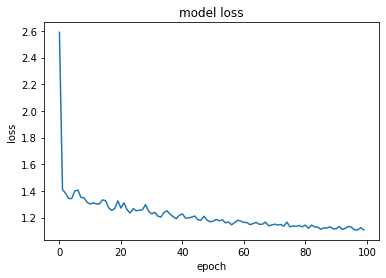

In [21]:
##########################################################
#model white(node 추가)
modelw_n = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelw_n.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelw_n.summary()
white_result=modelw_n.fit(x_white_train, y_white_train, epochs=100)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 white_wine 모델:0.4184

In [22]:
modelw_n.evaluate(x_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.0416 - acc: 0.5565


[1.0415534319520807, 0.5564626]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 11)                715       
Total params: 18,123
Trainable params: 18,123
Non-trainable params: 0
__________________________________________________

3428/3428 [==============================] - 0s 32us/sample - loss: 1.0761 - acc: 0.5114
Epoch 70/100
3428/3428 [==============================] - 0s 32us/sample - loss: 1.0820 - acc: 0.5219
Epoch 71/100
3428/3428 [==============================] - 0s 32us/sample - loss: 1.0865 - acc: 0.5137
Epoch 72/100
3428/3428 [==============================] - 0s 33us/sample - loss: 1.0710 - acc: 0.5289
Epoch 73/100
3428/3428 [==============================] - 0s 31us/sample - loss: 1.0761 - acc: 0.5131
Epoch 74/100
3428/3428 [==============================] - 0s 34us/sample - loss: 1.0748 - acc: 0.5265
Epoch 75/100
3428/3428 [==============================] - 0s 41us/sample - loss: 1.0894 - acc: 0.5093
Epoch 76/100
3428/3428 [==============================] - 0s 38us/sample - loss: 1.0690 - acc: 0.5230
Epoch 77/100
3428/3428 [==============================] - 0s 38us/sample - loss: 1.0915 - acc: 0.5096
Epoch 78/100
3428/3428 [==============================] - 0s 33us/sample - loss: 1.0982 - acc: 

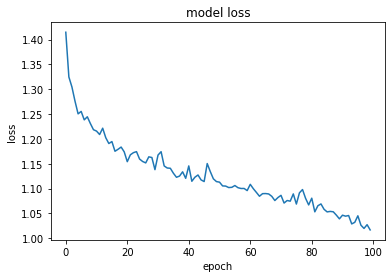

In [23]:
##########################################################
#model white(layer, node 추가)
modelw_ln = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelw_ln.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelw_ln.summary()
white_result=modelw_ln.fit(x_white_train, y_white_train, epochs=100)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 white_wine 모델:0.4184

In [24]:
modelw_ln.evaluate(x_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.1318 - acc: 0.4789


[1.1318413030533563, 0.47891158]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 11)                715       
Total params: 18,123
Trainable params: 18,123
Non-trainable params: 0
__________________________________________________

Epoch 70/100
3428/3428 [==============================] - 0s 34us/sample - loss: 1.0446 - acc: 0.5295
Epoch 71/100
3428/3428 [==============================] - 0s 34us/sample - loss: 1.0532 - acc: 0.5245
Epoch 72/100
3428/3428 [==============================] - 0s 33us/sample - loss: 1.0563 - acc: 0.5123
Epoch 73/100
3428/3428 [==============================] - 0s 33us/sample - loss: 1.0267 - acc: 0.5391
Epoch 74/100
3428/3428 [==============================] - 0s 39us/sample - loss: 1.0499 - acc: 0.5251
Epoch 75/100
3428/3428 [==============================] - 0s 35us/sample - loss: 1.0215 - acc: 0.5511
Epoch 76/100
3428/3428 [==============================] - 0s 35us/sample - loss: 1.0523 - acc: 0.5303
Epoch 77/100
3428/3428 [==============================] - 0s 36us/sample - loss: 1.0311 - acc: 0.5420
Epoch 78/100
3428/3428 [==============================] - 0s 34us/sample - loss: 1.0205 - acc: 0.5420
Epoch 79/100
3428/3428 [==============================] - 0s 34us/sample - loss: 1

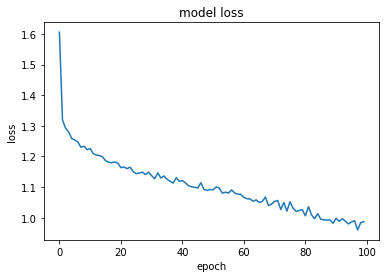

In [25]:
##########################################################
#model white(learning rate)
modelw_lr = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelw_lr.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
modelw_lr.summary()
white_result=modelw_lr.fit(x_white_train, y_white_train, epochs=100)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 white_wine 모델:0.4184

In [26]:
modelw_lr.evaluate(x_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.3989 - acc: 0.4027


[1.3988962973056196, 0.40272108]

In [27]:
#########################코드########################
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')
#####################################################

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import sklearn

In [29]:
from sklearn.model_selection import train_test_split
#####################################################
def generate_data(df, t_r):
    df_shuffled = sklearn.utils.shuffle(df)
    train_len = int(len(df_shuffled)*t_r)
    X_train = df_shuffled.iloc[:train_len,:11]
    X_test = df_shuffled.iloc[train_len:,:11]
    Y_train = df_shuffled.iloc[:train_len,-1]
    Y_test = df_shuffled.iloc[train_len:,-1]
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [30]:
#정답 셋이 너무 같은 것만 있어서 다시 categorize 작업을 함.
# 5이하를 0, 6과 7을 1로 함. 
#8,9,10이 거의 없어서 하나로 categorize 함.
def y_categorize(qul):
    if qul <= 5 :
        return 0
    elif qul == 6 :
        return 1
    elif qul == 7 :
        return 1
    else :
        return 2
    
white_wine['quality']=white_wine['quality'].apply(lambda x : y_categorize(x))

In [31]:
x_white_train, y_white_train, x_white_test, y_white_test = generate_data(white_wine, 0.7)

In [32]:
# x 값들을 정규화
robustScaler = RobustScaler()
robustScaler.fit(x_white_train)
x_scaled_white_train = robustScaler.transform(x_white_train)
x_scaled_white_test = robustScaler.transform(x_white_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 32)               

3428/3428 [==============================] - 0s 40us/sample - loss: 0.2665 - acc: 0.8991
Epoch 62/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.2726 - acc: 0.8985
Epoch 63/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.2476 - acc: 0.9069
Epoch 64/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.2490 - acc: 0.9081
Epoch 65/1000
3428/3428 [==============================] - 0s 42us/sample - loss: 0.2258 - acc: 0.9215
Epoch 66/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.2300 - acc: 0.9180
Epoch 67/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.2258 - acc: 0.9186
Epoch 68/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.2223 - acc: 0.9172
Epoch 69/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.2610 - acc: 0.9017
Epoch 70/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.232

3428/3428 [==============================] - 0s 45us/sample - loss: 0.0817 - acc: 0.9697
Epoch 141/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0812 - acc: 0.9711
Epoch 142/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0843 - acc: 0.9720
Epoch 143/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.1196 - acc: 0.9568
Epoch 144/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.1041 - acc: 0.9618
Epoch 145/1000
3428/3428 [==============================] - 0s 51us/sample - loss: 0.1147 - acc: 0.9592
Epoch 146/1000
3428/3428 [==============================] - 0s 47us/sample - loss: 0.1638 - acc: 0.9393
Epoch 147/1000
3428/3428 [==============================] - 0s 36us/sample - loss: 0.0803 - acc: 0.9700
Epoch 148/1000
3428/3428 [==============================] - 0s 42us/sample - loss: 0.1351 - acc: 0.9539
Epoch 149/1000
3428/3428 [==============================] - 0s 38us/sample - lo

3428/3428 [==============================] - 0s 39us/sample - loss: 0.0704 - acc: 0.9720
Epoch 219/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.1159 - acc: 0.9597
Epoch 220/1000
3428/3428 [==============================] - 0s 42us/sample - loss: 0.0694 - acc: 0.9746
Epoch 221/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0354 - acc: 0.9892
Epoch 222/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0378 - acc: 0.98660s - loss: 0.0316 - acc: 0.98
Epoch 223/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0763 - acc: 0.9752
Epoch 224/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0953 - acc: 0.9682
Epoch 225/1000
3428/3428 [==============================] - 0s 44us/sample - loss: 0.0950 - acc: 0.9635
Epoch 226/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0460 - acc: 0.9842
Epoch 227/1000
3428/3428 [========================

3428/3428 [==============================] - 0s 40us/sample - loss: 0.0612 - acc: 0.9807
Epoch 297/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0844 - acc: 0.9740
Epoch 298/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0355 - acc: 0.9860
Epoch 299/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0497 - acc: 0.9825
Epoch 300/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0783 - acc: 0.9761
Epoch 301/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0677 - acc: 0.9793
Epoch 302/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0423 - acc: 0.9875
Epoch 303/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0469 - acc: 0.9837
Epoch 304/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0456 - acc: 0.9822
Epoch 305/1000
3428/3428 [==============================] - 0s 39us/sample - lo

3428/3428 [==============================] - 0s 39us/sample - loss: 0.0680 - acc: 0.9749
Epoch 375/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0545 - acc: 0.9848
Epoch 376/1000
3428/3428 [==============================] - 0s 42us/sample - loss: 0.0241 - acc: 0.9898
Epoch 377/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0317 - acc: 0.9889
Epoch 378/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.1191 - acc: 0.9650
Epoch 379/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0251 - acc: 0.9910
Epoch 380/1000
3428/3428 [==============================] - 0s 41us/sample - loss: 0.0399 - acc: 0.98690s - loss: 0.0176 - acc: 0.99
Epoch 381/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0515 - acc: 0.9807
Epoch 382/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0610 - acc: 0.9802
Epoch 383/1000
3428/3428 [========================

3428/3428 [==============================] - 0s 39us/sample - loss: 0.0513 - acc: 0.9822
Epoch 453/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0370 - acc: 0.9857
Epoch 454/1000
3428/3428 [==============================] - 0s 41us/sample - loss: 0.0293 - acc: 0.9886
Epoch 455/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0247 - acc: 0.9915
Epoch 456/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0816 - acc: 0.9770
Epoch 457/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0538 - acc: 0.9810
Epoch 458/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0579 - acc: 0.9822
Epoch 459/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0184 - acc: 0.9921
Epoch 460/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0249 - acc: 0.9921
Epoch 461/1000
3428/3428 [==============================] - 0s 40us/sample - lo

3428/3428 [==============================] - 0s 39us/sample - loss: 0.0550 - acc: 0.9825
Epoch 531/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0662 - acc: 0.9775
Epoch 532/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0481 - acc: 0.9845
Epoch 533/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0385 - acc: 0.9875
Epoch 534/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0407 - acc: 0.9837
Epoch 535/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0232 - acc: 0.9933
Epoch 536/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0120 - acc: 0.9965
Epoch 537/1000
3428/3428 [==============================] - 0s 37us/sample - loss: 0.0207 - acc: 0.9918
Epoch 538/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0130 - acc: 0.9947
Epoch 539/1000
3428/3428 [==============================] - 0s 39us/sample - lo

3428/3428 [==============================] - 0s 39us/sample - loss: 0.0409 - acc: 0.9875
Epoch 609/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0367 - acc: 0.9863
Epoch 610/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0094 - acc: 0.9971
Epoch 611/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0106 - acc: 0.9956
Epoch 612/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0159 - acc: 0.9930
Epoch 613/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0814 - acc: 0.9740
Epoch 614/1000
3428/3428 [==============================] - 0s 41us/sample - loss: 0.0359 - acc: 0.9866
Epoch 615/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0440 - acc: 0.9834
Epoch 616/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0286 - acc: 0.9912
Epoch 617/1000
3428/3428 [==============================] - 0s 38us/sample - lo

3428/3428 [==============================] - 0s 40us/sample - loss: 0.0084 - acc: 0.9956
Epoch 687/1000
3428/3428 [==============================] - 0s 44us/sample - loss: 0.0069 - acc: 0.9962
Epoch 688/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0076 - acc: 0.9965
Epoch 689/1000
3428/3428 [==============================] - 0s 45us/sample - loss: 0.0071 - acc: 0.9956
Epoch 690/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0061 - acc: 0.9974
Epoch 691/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0102 - acc: 0.9950
Epoch 692/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.1099 - acc: 0.9679
Epoch 693/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.0575 - acc: 0.9787
Epoch 694/1000
3428/3428 [==============================] - 0s 46us/sample - loss: 0.0633 - acc: 0.9758
Epoch 695/1000
3428/3428 [==============================] - 0s 44us/sample - lo

3428/3428 [==============================] - 0s 44us/sample - loss: 0.0447 - acc: 0.9842
Epoch 765/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0298 - acc: 0.9895
Epoch 766/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0181 - acc: 0.9942
Epoch 767/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0229 - acc: 0.9918
Epoch 768/1000
3428/3428 [==============================] - ETA: 0s - loss: 0.0161 - acc: 0.994 - 0s 44us/sample - loss: 0.0194 - acc: 0.9933
Epoch 769/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.0304 - acc: 0.9910
Epoch 770/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0231 - acc: 0.9910
Epoch 771/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0145 - acc: 0.9942
Epoch 772/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0365 - acc: 0.9892
Epoch 773/1000
3428/3428 [===============

3428/3428 [==============================] - 0s 42us/sample - loss: 0.0247 - acc: 0.9918
Epoch 843/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0173 - acc: 0.9953
Epoch 844/1000
3428/3428 [==============================] - 0s 41us/sample - loss: 0.0081 - acc: 0.9965
Epoch 845/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0073 - acc: 0.9968
Epoch 846/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0074 - acc: 0.9962
Epoch 847/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0056 - acc: 0.9977
Epoch 848/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0059 - acc: 0.9968
Epoch 849/1000
3428/3428 [==============================] - 0s 40us/sample - loss: 0.0057 - acc: 0.9968
Epoch 850/1000
3428/3428 [==============================] - 0s 44us/sample - loss: 0.0065 - acc: 0.9968
Epoch 851/1000
3428/3428 [==============================] - 0s 40us/sample - lo

3428/3428 [==============================] - 0s 47us/sample - loss: 0.0283 - acc: 0.9924
Epoch 921/1000
3428/3428 [==============================] - 0s 46us/sample - loss: 0.0105 - acc: 0.9965
Epoch 922/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0092 - acc: 0.9968
Epoch 923/1000
3428/3428 [==============================] - 0s 42us/sample - loss: 0.0226 - acc: 0.9927
Epoch 924/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.0393 - acc: 0.9866
Epoch 925/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.0468 - acc: 0.9854
Epoch 926/1000
3428/3428 [==============================] - 0s 43us/sample - loss: 0.0172 - acc: 0.9921
Epoch 927/1000
3428/3428 [==============================] - 0s 45us/sample - loss: 0.0176 - acc: 0.9942
Epoch 928/1000
3428/3428 [==============================] - 0s 41us/sample - loss: 0.0448 - acc: 0.9886
Epoch 929/1000
3428/3428 [==============================] - 0s 39us/sample - lo

3428/3428 [==============================] - 0s 40us/sample - loss: 0.0287 - acc: 0.9904
Epoch 999/1000
3428/3428 [==============================] - 0s 39us/sample - loss: 0.0819 - acc: 0.9737
Epoch 1000/1000
3428/3428 [==============================] - 0s 38us/sample - loss: 0.0647 - acc: 0.9781


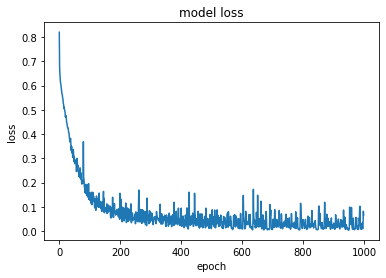

In [33]:
##########################################################
#model white(best)
modelw_b = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])
modelw_b.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
modelw_b.summary()
white_result=modelw_b.fit(x_scaled_white_train, y_white_train, epochs=1000)
plt.plot(white_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 white_wine 모델:0.4184

In [34]:
modelw_b.evaluate(x_scaled_white_test,y_white_test,verbose=2)

1470/1470 - 0s - loss: 1.8202 - acc: 0.7463


[1.8202233838386277, 0.7462585]

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 11)                363       
Total params: 4,971
Trainable params: 4,971
Non-trainable params: 0
____________________________________________________

Epoch 70/100
1119/1119 [==============================] - 0s 44us/sample - loss: 0.9029 - acc: 0.6005
Epoch 71/100
1119/1119 [==============================] - 0s 35us/sample - loss: 0.9361 - acc: 0.5809
Epoch 72/100
1119/1119 [==============================] - 0s 34us/sample - loss: 0.9034 - acc: 0.5996
Epoch 73/100
1119/1119 [==============================] - 0s 34us/sample - loss: 0.8966 - acc: 0.6068
Epoch 74/100
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8806 - acc: 0.6166
Epoch 75/100
1119/1119 [==============================] - 0s 32us/sample - loss: 0.8729 - acc: 0.6265
Epoch 76/100
1119/1119 [==============================] - 0s 35us/sample - loss: 0.8821 - acc: 0.6166
Epoch 77/100
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8855 - acc: 0.6104
Epoch 78/100
1119/1119 [==============================] - 0s 33us/sample - loss: 0.8793 - acc: 0.6059
Epoch 79/100
1119/1119 [==============================] - 0s 32us/sample - loss: 0

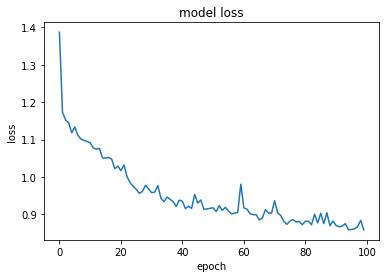

In [35]:
##########################################################
#model red(layer 추가)
modelr_l = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelr_l.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelr_l.summary()
red_result=modelr_l.fit(x_red_train, y_red_train, epochs=100)
plt.plot(red_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
#기존 red_wine 모델: 0.5625

In [36]:
modelr_l.evaluate(x_red_test,y_red_test,verbose=2)

480/480 - 0s - loss: 1.0371 - acc: 0.5792


[1.0371346394220988, 0.57916665]

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 11)                715       
Total params: 5,643
Trainable params: 5,643
Non-trainable params: 0
_________________________________________________________________
Train on 1119 samples
Epoch 1/100
1119/1119 [==============================] - 0s 118us/sample - loss: 2.0716 - acc: 0.4030
Epoch 2/100
1119/1119 [==============================] - 0s 38us/sample - loss: 1.1916 - acc: 0.4835
Epoch 3/100
1119/1119 [==============================] - 0s 40us/sample - loss: 1.1779 - acc: 0.4870
Epoch 4/100
1119/1119 [==============================] 

1119/1119 [==============================] - 0s 33us/sample - loss: 0.8943 - acc: 0.6086
Epoch 74/100
1119/1119 [==============================] - 0s 30us/sample - loss: 0.9056 - acc: 0.5970
Epoch 75/100
1119/1119 [==============================] - 0s 31us/sample - loss: 0.8995 - acc: 0.6077
Epoch 76/100
1119/1119 [==============================] - 0s 33us/sample - loss: 0.9248 - acc: 0.5898
Epoch 77/100
1119/1119 [==============================] - 0s 32us/sample - loss: 0.9060 - acc: 0.6130
Epoch 78/100
1119/1119 [==============================] - 0s 32us/sample - loss: 0.8807 - acc: 0.6130
Epoch 79/100
1119/1119 [==============================] - 0s 31us/sample - loss: 0.8979 - acc: 0.6202
Epoch 80/100
1119/1119 [==============================] - 0s 32us/sample - loss: 0.8931 - acc: 0.6193
Epoch 81/100
1119/1119 [==============================] - 0s 30us/sample - loss: 0.8790 - acc: 0.6202
Epoch 82/100
1119/1119 [==============================] - 0s 29us/sample - loss: 0.8825 - acc: 

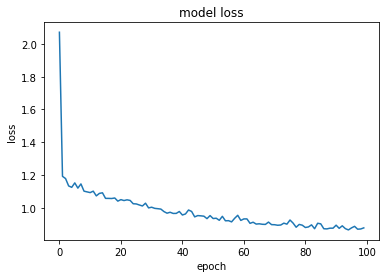

In [37]:
##########################################################
#model red(node 추가)
modelr_n = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelr_n.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelr_n.summary()
red_result=modelr_n.fit(x_red_train, y_red_train, epochs=100)
plt.plot(red_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
#기존 red_wine 모델: 0.5625

In [38]:
modelr_n.evaluate(x_red_test,y_red_test,verbose=2)

480/480 - 0s - loss: 1.0615 - acc: 0.6021


[1.0615300099054972, 0.6020833]

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_53 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 11)                715       
Total params: 18,123
Trainable params: 18,123
Non-trainable params: 0
_________________________________________________

1119/1119 [==============================] - 0s 38us/sample - loss: 0.8539 - acc: 0.6130
Epoch 70/100
1119/1119 [==============================] - 0s 38us/sample - loss: 0.8446 - acc: 0.6291
Epoch 71/100
1119/1119 [==============================] - 0s 39us/sample - loss: 0.8385 - acc: 0.6291
Epoch 72/100
1119/1119 [==============================] - 0s 37us/sample - loss: 0.8538 - acc: 0.6077
Epoch 73/100
1119/1119 [==============================] - 0s 38us/sample - loss: 0.8239 - acc: 0.6318
Epoch 74/100
1119/1119 [==============================] - 0s 37us/sample - loss: 0.8369 - acc: 0.6211
Epoch 75/100
1119/1119 [==============================] - 0s 37us/sample - loss: 0.8272 - acc: 0.6300
Epoch 76/100
1119/1119 [==============================] - 0s 42us/sample - loss: 0.8211 - acc: 0.6211
Epoch 77/100
1119/1119 [==============================] - 0s 37us/sample - loss: 0.8320 - acc: 0.6265
Epoch 78/100
1119/1119 [==============================] - 0s 38us/sample - loss: 0.8403 - acc: 

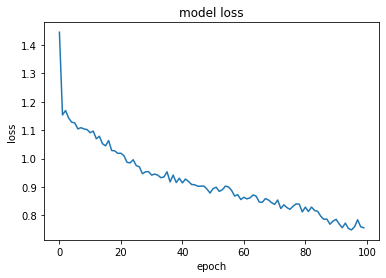

In [39]:
##########################################################
#model red(learning rate)
modelr_lr = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11,activation='softmax')
])
modelr_lr.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
modelr_lr.summary()
red_result=modelr_lr.fit(x_red_train, y_red_train, epochs=100)
plt.plot(red_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
#기존 red_wine 모델: 0.5625

In [40]:
modelr_lr.evaluate(x_red_test,y_red_test,verbose=2)

480/480 - 0s - loss: 1.1414 - acc: 0.5562


[1.141444484392802, 0.55625]

In [41]:
from sklearn.model_selection import train_test_split
#####################################################
def generate_data(df, t_r):
    df_shuffled = sklearn.utils.shuffle(df)
    train_len = int(len(df_shuffled)*t_r)
    X_train = df_shuffled.iloc[:train_len,:11]
    X_test = df_shuffled.iloc[train_len:,:11]
    Y_train = df_shuffled.iloc[:train_len,-1]
    Y_test = df_shuffled.iloc[train_len:,-1]
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [42]:
#정답 셋이 너무 같은 것만 있어서 다시 categorize 작업을 함.
# 5이하를 0, 6과 7을 1로 함. 
#8,9,10이 거의 없어서 하나로 categorize 함.
def y_categorize(qul):
    if qul <= 5 :
        return 0
    elif qul == 6 :
        return 1
    elif qul == 7 :
        return 1
    else :
        return 2
    
red_wine['quality']=red_wine['quality'].apply(lambda x : y_categorize(x))

In [43]:
x_red_train, y_red_train, x_red_test, y_red_test = generate_data(red_wine, 0.7)

In [44]:
display(y_red_test)

1016    1
48      0
659     0
51      1
55      0
       ..
513     1
748     1
1432    1
722     0
1323    1
Name: quality, Length: 480, dtype: int64

In [45]:
#x_red_train, y_red_train, x_red_test, y_red_test
robustScaler = RobustScaler()
robustScaler.fit(x_red_train)
x_scaled_red_train = robustScaler.transform(x_red_train)
x_scaled_red_test = robustScaler.transform(x_red_test)

In [46]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,0


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_59 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_64 (Dense)             (None, 32)              

1119/1119 [==============================] - 0s 43us/sample - loss: 0.1123 - acc: 0.9607
Epoch 63/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1326 - acc: 0.9535
Epoch 64/1000
1119/1119 [==============================] - 0s 54us/sample - loss: 0.1260 - acc: 0.9535
Epoch 65/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.1117 - acc: 0.9607
Epoch 66/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0992 - acc: 0.9669
Epoch 67/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.1076 - acc: 0.9535
Epoch 68/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.1563 - acc: 0.9455
Epoch 69/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0954 - acc: 0.9616
Epoch 70/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1024 - acc: 0.9616
Epoch 71/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.080

1119/1119 [==============================] - 0s 44us/sample - loss: 0.0282 - acc: 0.9929
Epoch 141/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0173 - acc: 0.9946
Epoch 142/1000
1119/1119 [==============================] - 0s 42us/sample - loss: 0.0218 - acc: 0.9929
Epoch 143/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0079 - acc: 0.9982
Epoch 144/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0077 - acc: 0.9955
Epoch 145/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0130 - acc: 0.9937
Epoch 146/1000
1119/1119 [==============================] - 0s 51us/sample - loss: 0.0136 - acc: 0.9937
Epoch 147/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0075 - acc: 0.9964
Epoch 148/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0065 - acc: 0.9964
Epoch 149/1000
1119/1119 [==============================] - 0s 43us/sample - lo

1119/1119 [==============================] - 0s 44us/sample - loss: 0.0195 - acc: 0.9937
Epoch 219/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0063 - acc: 0.9973
Epoch 220/1000
1119/1119 [==============================] - 0s 41us/sample - loss: 0.0062 - acc: 0.9973
Epoch 221/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0063 - acc: 0.9964
Epoch 222/1000
1119/1119 [==============================] - 0s 48us/sample - loss: 0.0152 - acc: 0.9964
Epoch 223/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0086 - acc: 0.9955
Epoch 224/1000
1119/1119 [==============================] - 0s 42us/sample - loss: 0.0052 - acc: 0.9973
Epoch 225/1000
1119/1119 [==============================] - 0s 42us/sample - loss: 0.0079 - acc: 0.9946
Epoch 226/1000
1119/1119 [==============================] - 0s 51us/sample - loss: 0.0157 - acc: 0.9964
Epoch 227/1000
1119/1119 [==============================] - 0s 51us/sample - lo

1119/1119 [==============================] - 0s 56us/sample - loss: 0.0640 - acc: 0.9750
Epoch 297/1000
1119/1119 [==============================] - 0s 55us/sample - loss: 0.0193 - acc: 0.9929
Epoch 298/1000
1119/1119 [==============================] - 0s 50us/sample - loss: 0.0143 - acc: 0.9946
Epoch 299/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0069 - acc: 0.9955
Epoch 300/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0117 - acc: 0.9964
Epoch 301/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0104 - acc: 0.9973
Epoch 302/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0139 - acc: 0.9946
Epoch 303/1000
1119/1119 [==============================] - 0s 49us/sample - loss: 0.0124 - acc: 0.9937
Epoch 304/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0262 - acc: 0.9911
Epoch 305/1000
1119/1119 [==============================] - 0s 43us/sample - lo

1119/1119 [==============================] - 0s 44us/sample - loss: 0.0639 - acc: 0.9794
Epoch 375/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0348 - acc: 0.9893
Epoch 376/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0252 - acc: 0.9937
Epoch 377/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0139 - acc: 0.9946
Epoch 378/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0405 - acc: 0.9902
Epoch 379/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0383 - acc: 0.9875
Epoch 380/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0137 - acc: 0.9964
Epoch 381/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0128 - acc: 0.9937
Epoch 382/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0617 - acc: 0.9732
Epoch 383/1000
1119/1119 [==============================] - 0s 47us/sample - lo

1119/1119 [==============================] - 0s 43us/sample - loss: 0.0051 - acc: 0.9973
Epoch 453/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0039 - acc: 0.9991
Epoch 454/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0054 - acc: 0.9964
Epoch 455/1000
1119/1119 [==============================] - 0s 54us/sample - loss: 0.0039 - acc: 0.9973
Epoch 456/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0037 - acc: 0.9982
Epoch 457/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0044 - acc: 0.9964
Epoch 458/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0034 - acc: 0.9991
Epoch 459/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0038 - acc: 0.9982
Epoch 460/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0033 - acc: 0.9973
Epoch 461/1000
1119/1119 [==============================] - 0s 43us/sample - lo

1119/1119 [==============================] - 0s 55us/sample - loss: 0.0039 - acc: 0.9973
Epoch 531/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0032 - acc: 0.9991
Epoch 532/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0039 - acc: 0.9982
Epoch 533/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0035 - acc: 0.9991
Epoch 534/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0050 - acc: 0.9973
Epoch 535/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0119 - acc: 0.9964
Epoch 536/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.1415 - acc: 0.9571
Epoch 537/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.1023 - acc: 0.9651
Epoch 538/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0818 - acc: 0.9750
Epoch 539/1000
1119/1119 [==============================] - 0s 44us/sample - lo

1119/1119 [==============================] - 0s 46us/sample - loss: 0.0040 - acc: 0.9973
Epoch 609/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0034 - acc: 0.9982
Epoch 610/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0039 - acc: 0.9973
Epoch 611/1000
1119/1119 [==============================] - 0s 48us/sample - loss: 0.0036 - acc: 0.9973
Epoch 612/1000
1119/1119 [==============================] - 0s 49us/sample - loss: 0.0039 - acc: 0.9973
Epoch 613/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0042 - acc: 0.9964
Epoch 614/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0040 - acc: 0.9964
Epoch 615/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0047 - acc: 0.9982
Epoch 616/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0173 - acc: 0.9955
Epoch 617/1000
1119/1119 [==============================] - 0s 45us/sample - lo

1119/1119 [==============================] - 0s 44us/sample - loss: 0.0057 - acc: 0.9955
Epoch 687/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0194 - acc: 0.9946
Epoch 688/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0185 - acc: 0.9929
Epoch 689/1000
1119/1119 [==============================] - 0s 54us/sample - loss: 0.1282 - acc: 0.9544
Epoch 690/1000
1119/1119 [==============================] - 0s 51us/sample - loss: 0.0650 - acc: 0.9732
Epoch 691/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0226 - acc: 0.9937
Epoch 692/1000
1119/1119 [==============================] - 0s 51us/sample - loss: 0.0201 - acc: 0.9929
Epoch 693/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0392 - acc: 0.9902
Epoch 694/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0293 - acc: 0.9893
Epoch 695/1000
1119/1119 [==============================] - 0s 52us/sample - lo

1119/1119 [==============================] - 0s 48us/sample - loss: 0.0036 - acc: 0.9973
Epoch 765/1000
1119/1119 [==============================] - 0s 48us/sample - loss: 0.0036 - acc: 0.9964
Epoch 766/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0032 - acc: 0.9982
Epoch 767/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0081 - acc: 0.9964
Epoch 768/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0076 - acc: 0.9973
Epoch 769/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0038 - acc: 0.9982
Epoch 770/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0034 - acc: 0.9982
Epoch 771/1000
1119/1119 [==============================] - 0s 48us/sample - loss: 0.0030 - acc: 0.9991
Epoch 772/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0055 - acc: 0.9973
Epoch 773/1000
1119/1119 [==============================] - 0s 46us/sample - lo

1119/1119 [==============================] - 0s 45us/sample - loss: 0.0042 - acc: 0.9982
Epoch 843/1000
1119/1119 [==============================] - 0s 48us/sample - loss: 0.0043 - acc: 0.9982
Epoch 844/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0035 - acc: 0.9991
Epoch 845/1000
1119/1119 [==============================] - 0s 46us/sample - loss: 0.0029 - acc: 0.9991
Epoch 846/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0042 - acc: 0.9964
Epoch 847/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0050 - acc: 0.9973
Epoch 848/1000
1119/1119 [==============================] - 0s 43us/sample - loss: 0.0045 - acc: 0.9973
Epoch 849/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0046 - acc: 0.9973
Epoch 850/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0056 - acc: 0.9964
Epoch 851/1000
1119/1119 [==============================] - ETA: 0s - loss: 8.9

1119/1119 [==============================] - 0s 46us/sample - loss: 0.0044 - acc: 0.9991
Epoch 921/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0040 - acc: 0.9982
Epoch 922/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0038 - acc: 0.9982
Epoch 923/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0025 - acc: 1.0000
Epoch 924/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0018 - acc: 1.0000
Epoch 925/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0064 - acc: 0.9973
Epoch 926/1000
1119/1119 [==============================] - 0s 47us/sample - loss: 0.0055 - acc: 0.9973
Epoch 927/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0035 - acc: 0.9982
Epoch 928/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0033 - acc: 0.9991
Epoch 929/1000
1119/1119 [==============================] - 0s 44us/sample - lo

1119/1119 [==============================] - 0s 44us/sample - loss: 0.0014 - acc: 0.9991
Epoch 999/1000
1119/1119 [==============================] - 0s 44us/sample - loss: 0.0015 - acc: 0.9982
Epoch 1000/1000
1119/1119 [==============================] - 0s 45us/sample - loss: 0.0016 - acc: 0.9982


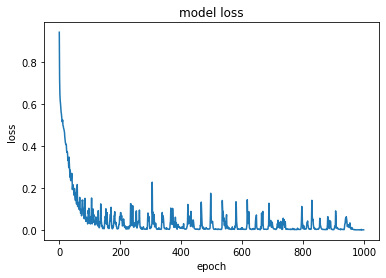

In [47]:
##########################################################
#model red(best)
modelr_b = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])
modelr_b.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
modelr_b.summary()
red_result=modelr_b.fit(x_scaled_red_train, y_red_train, epochs=1000)
plt.plot(red_result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################
#기존 red_wine 모델: 0.5625

In [48]:
modelr_b.evaluate(x_scaled_red_test,y_red_test,verbose=2)

480/480 - 0s - loss: 3.3142 - acc: 0.7625


[3.3141761938730876, 0.7625]

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [49]:
#########################코드########################
red_wine = pd.read_csv('winequality-red.csv')
white_wine = pd.read_csv('winequality-white.csv')
#####################################################

In [50]:
##########################################################
frames = [red_wine,white_wine]
wine_data=pd.concat(frames,ignore_index=True)
display(wine_data)
###########################################################

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [51]:
from sklearn.model_selection import train_test_split
#####################################################
def generate_data(df, t_r):
    df_shuffled = sklearn.utils.shuffle(df)
    train_len = int(len(df_shuffled)*t_r)
    X_train = df_shuffled.iloc[:train_len,:11]
    X_test = df_shuffled.iloc[train_len:,:11]
    Y_train = df_shuffled.iloc[:train_len,-1]
    Y_test = df_shuffled.iloc[train_len:,-1]
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [52]:
#정답 셋이 너무 같은 것만 있어서 다시 categorize 작업을 함. 
# 5이하를 0, 6과 7을 1로 함. 
#8,9,10이 거의 없어서 하나로 categorize 함.
def y_categorize(qul):
    if qul <= 5 :
        return 0
    elif qul == 6 :
        return 1
    elif qul == 7 :
        return 1
    else :
        return 2
    
wine_data['quality']=wine_data['quality'].apply(lambda x : y_categorize(x))

In [53]:
x_wine_train, y_wine_train, x_wine_test, y_wine_test = generate_data(wine_data, 0.7)

In [54]:
#x_wine_train, y_wine_train, x_wine_test, y_wine_test
robustScaler = RobustScaler()
robustScaler.fit(x_wine_train)
x_scaled_wine_train = robustScaler.transform(x_wine_train)
x_scaled_wine_test = robustScaler.transform(x_wine_test)

In [55]:
display(y_wine_train)

425     1
4214    1
4013    0
55      0
5418    1
       ..
3420    0
6161    1
1361    0
2586    1
5187    1
Name: quality, Length: 4547, dtype: int64

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_69 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_74 (Dense)             (None, 32)              

4547/4547 [==============================] - 0s 45us/sample - loss: 0.3413 - acc: 0.8467
Epoch 63/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.4130 - acc: 0.8234
Epoch 64/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.3465 - acc: 0.8483
Epoch 65/1000
4547/4547 [==============================] - 0s 44us/sample - loss: 0.3402 - acc: 0.8507
Epoch 66/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.3173 - acc: 0.8645
Epoch 67/1000
4547/4547 [==============================] - 0s 54us/sample - loss: 0.3175 - acc: 0.8625
Epoch 68/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.3070 - acc: 0.8645
Epoch 69/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.3061 - acc: 0.8674
Epoch 70/1000
4547/4547 [==============================] - 0s 50us/sample - loss: 0.3189 - acc: 0.8645
Epoch 71/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.296

4547/4547 [==============================] - 0s 47us/sample - loss: 0.1497 - acc: 0.9391
Epoch 142/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.1593 - acc: 0.9316
Epoch 143/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.1748 - acc: 0.9270
Epoch 144/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.1423 - acc: 0.9380
Epoch 145/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.1644 - acc: 0.9336
Epoch 146/1000
4547/4547 [==============================] - 0s 50us/sample - loss: 0.1816 - acc: 0.9281
Epoch 147/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.1876 - acc: 0.9268
Epoch 148/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.1706 - acc: 0.9312
Epoch 149/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.1748 - acc: 0.9252
Epoch 150/1000
4547/4547 [==============================] - 0s 48us/sample - lo

4547/4547 [==============================] - 0s 50us/sample - loss: 0.1009 - acc: 0.9633
Epoch 220/1000
4547/4547 [==============================] - 0s 52us/sample - loss: 0.1025 - acc: 0.9611
Epoch 221/1000
4547/4547 [==============================] - 0s 51us/sample - loss: 0.1078 - acc: 0.9600
Epoch 222/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0726 - acc: 0.9747
Epoch 223/1000
4547/4547 [==============================] - 0s 54us/sample - loss: 0.0972 - acc: 0.9606
Epoch 224/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.1326 - acc: 0.9582
Epoch 225/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.1058 - acc: 0.9587
Epoch 226/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.0650 - acc: 0.9773
Epoch 227/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0900 - acc: 0.9672
Epoch 228/1000
4547/4547 [==============================] - 0s 54us/sample - lo

4547/4547 [==============================] - 0s 46us/sample - loss: 0.0607 - acc: 0.9767
Epoch 298/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0672 - acc: 0.9754
Epoch 299/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0721 - acc: 0.9749
Epoch 300/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0909 - acc: 0.9721
Epoch 301/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0694 - acc: 0.9756
Epoch 302/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0645 - acc: 0.9769
Epoch 303/1000
4547/4547 [==============================] - 0s 44us/sample - loss: 0.1101 - acc: 0.9633
Epoch 304/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0904 - acc: 0.9617
Epoch 305/1000
4547/4547 [==============================] - 0s 50us/sample - loss: 0.0753 - acc: 0.9747
Epoch 306/1000
4547/4547 [==============================] - 0s 48us/sample - lo

4547/4547 [==============================] - 0s 45us/sample - loss: 0.0547 - acc: 0.9824
Epoch 376/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0515 - acc: 0.9813
Epoch 377/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0911 - acc: 0.9718
Epoch 378/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0664 - acc: 0.9780
Epoch 379/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0716 - acc: 0.9769
Epoch 380/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0600 - acc: 0.9769
Epoch 381/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0409 - acc: 0.9850
Epoch 382/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0424 - acc: 0.9861
Epoch 383/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0289 - acc: 0.9903
Epoch 384/1000
4547/4547 [==============================] - 0s 46us/sample - lo

4547/4547 [==============================] - 0s 46us/sample - loss: 0.0546 - acc: 0.9822
Epoch 454/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0576 - acc: 0.9784
Epoch 455/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0438 - acc: 0.9864
Epoch 456/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0814 - acc: 0.9732
Epoch 457/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0479 - acc: 0.9826
Epoch 458/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0233 - acc: 0.9916
Epoch 459/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0377 - acc: 0.9875
Epoch 460/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0552 - acc: 0.9811
Epoch 461/1000
4547/4547 [==============================] - 0s 44us/sample - loss: 0.0723 - acc: 0.9765
Epoch 462/1000
4547/4547 [==============================] - 0s 46us/sample - lo

4547/4547 [==============================] - 0s 45us/sample - loss: 0.0406 - acc: 0.9857
Epoch 532/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0803 - acc: 0.9712
Epoch 533/1000
4547/4547 [==============================] - 0s 44us/sample - loss: 0.0385 - acc: 0.9866
Epoch 534/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0406 - acc: 0.9861
Epoch 535/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0634 - acc: 0.9802
Epoch 536/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0473 - acc: 0.9837
Epoch 537/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0932 - acc: 0.9701
Epoch 538/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0330 - acc: 0.9910
Epoch 539/1000
4547/4547 [==============================] - 0s 56us/sample - loss: 0.0378 - acc: 0.9870
Epoch 540/1000
4547/4547 [==============================] - 0s 56us/sample - lo

Epoch 609/1000
4547/4547 [==============================] - 0s 56us/sample - loss: 0.0580 - acc: 0.9822
Epoch 610/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.0548 - acc: 0.9831
Epoch 611/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0487 - acc: 0.9831
Epoch 612/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0397 - acc: 0.9844
Epoch 613/1000
4547/4547 [==============================] - 0s 65us/sample - loss: 0.0368 - acc: 0.9888
Epoch 614/1000
4547/4547 [==============================] - 0s 49us/sample - loss: 0.0603 - acc: 0.9784
Epoch 615/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.0648 - acc: 0.9778
Epoch 616/1000
4547/4547 [==============================] - 0s 49us/sample - loss: 0.0333 - acc: 0.9888
Epoch 617/1000
4547/4547 [==============================] - 0s 53us/sample - loss: 0.0542 - acc: 0.9824
Epoch 618/1000
4547/4547 [==============================] - 0s 4

4547/4547 [==============================] - 0s 47us/sample - loss: 0.0463 - acc: 0.9872
Epoch 688/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0361 - acc: 0.9886
Epoch 689/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0238 - acc: 0.9921
Epoch 690/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0590 - acc: 0.9848
Epoch 691/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0172 - acc: 0.9956
Epoch 692/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0186 - acc: 0.9941
Epoch 693/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0666 - acc: 0.9784
Epoch 694/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0546 - acc: 0.9817
Epoch 695/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0213 - acc: 0.9934
Epoch 696/1000
4547/4547 [==============================] - 0s 45us/sample - lo

4547/4547 [==============================] - 0s 46us/sample - loss: 0.0445 - acc: 0.9853
Epoch 766/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0610 - acc: 0.9815
Epoch 767/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0396 - acc: 0.9879
Epoch 768/1000
4547/4547 [==============================] - 0s 49us/sample - loss: 0.0598 - acc: 0.9791
Epoch 769/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0395 - acc: 0.9868
Epoch 770/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0240 - acc: 0.9923
Epoch 771/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.0308 - acc: 0.9899
Epoch 772/1000
4547/4547 [==============================] - 0s 49us/sample - loss: 0.0249 - acc: 0.9921
Epoch 773/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0624 - acc: 0.9787
Epoch 774/1000
4547/4547 [==============================] - 0s 45us/sample - lo

4547/4547 [==============================] - 0s 45us/sample - loss: 0.0270 - acc: 0.9914
Epoch 844/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0099 - acc: 0.9969
Epoch 845/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0168 - acc: 0.9943
Epoch 846/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0380 - acc: 0.9868
Epoch 847/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0502 - acc: 0.9831
Epoch 848/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.1301 - acc: 0.9657
Epoch 849/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0466 - acc: 0.9859
Epoch 850/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0430 - acc: 0.9842
Epoch 851/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0503 - acc: 0.9861
Epoch 852/1000
4547/4547 [==============================] - 0s 44us/sample - lo

4547/4547 [==============================] - 0s 48us/sample - loss: 0.0399 - acc: 0.9855
Epoch 922/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0445 - acc: 0.9861
Epoch 923/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0404 - acc: 0.9890
Epoch 924/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0210 - acc: 0.9927
Epoch 925/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0161 - acc: 0.9945
Epoch 926/1000
4547/4547 [==============================] - 0s 48us/sample - loss: 0.0152 - acc: 0.9941
Epoch 927/1000
4547/4547 [==============================] - 0s 47us/sample - loss: 0.0623 - acc: 0.9815
Epoch 928/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0520 - acc: 0.9828
Epoch 929/1000
4547/4547 [==============================] - 0s 45us/sample - loss: 0.0335 - acc: 0.9894
Epoch 930/1000
4547/4547 [==============================] - 0s 45us/sample - lo

4547/4547 [==============================] - 0s 45us/sample - loss: 0.0054 - acc: 0.9982
Epoch 1000/1000
4547/4547 [==============================] - 0s 46us/sample - loss: 0.0036 - acc: 0.9989


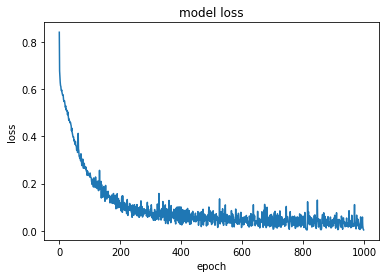

In [56]:
##########################################################
#model wine(best)
model_b = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])
model_b.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model_b.summary()
result=model_b.fit(x_scaled_wine_train, y_wine_train, epochs=1000)
plt.plot(result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
###########################################################
###########################################################

In [57]:
model_b.evaluate(x_scaled_wine_test,y_wine_test,verbose=2)

1950/1950 - 0s - loss: 3.3117 - acc: 0.7533


[3.3116907123418953, 0.75333333]